## PD 6
#### Artur Żółkowski


In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [2]:
faces, _ = fetch_olivetti_faces(return_X_y = True)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\artur\scikit_learn_data


In [3]:
faces.shape

(400, 4096)

### 0. wybrane obrazy

In [4]:
def plot_images(data, title, n_col, n_row):
    plt.figure(figsize=(4 * n_col, 4 * n_row))
    plt.subplots_adjust(top=0.95)
    for i, image in enumerate(data):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(image.reshape((64, 64)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
    plt.suptitle(title, size=16)
    plt.show()

In [15]:
ind = np.arange(0, 160, 10)

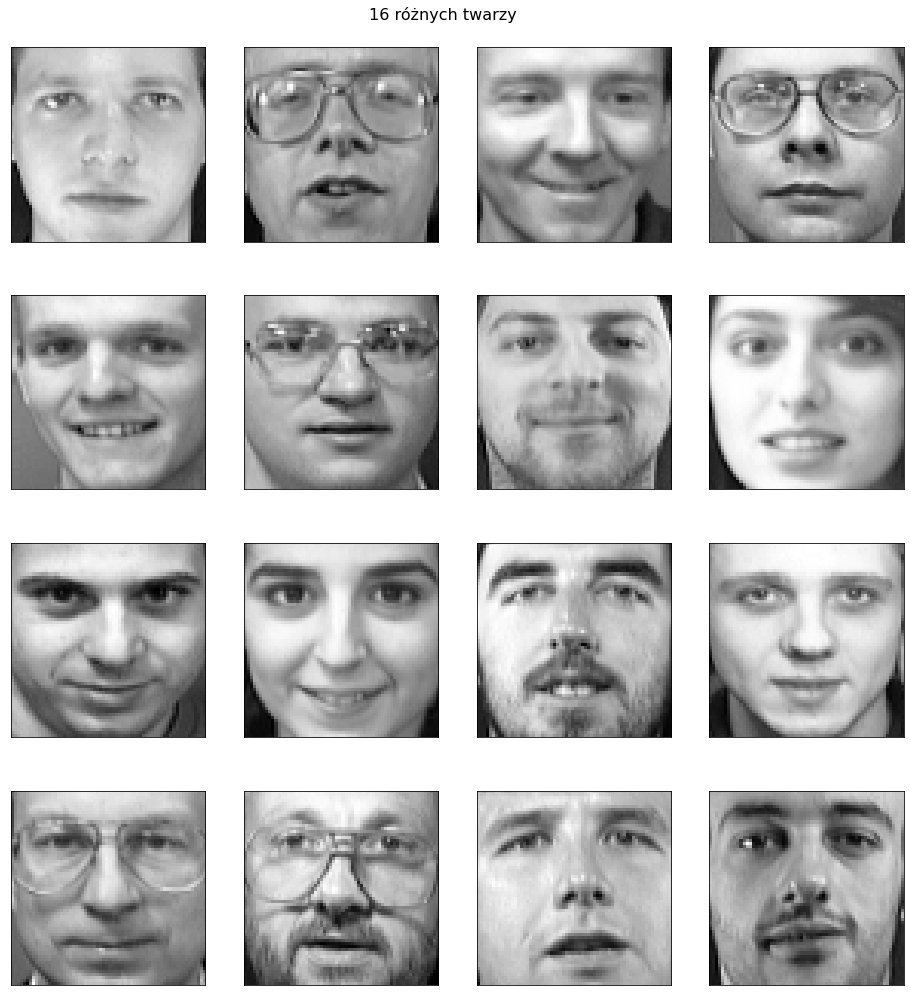

In [17]:
plot_images(faces[ind], "16 różnych twarzy", 4, 4)

### 1. PCA i stopień kompresji

In [19]:
pca = PCA(whiten = True)
pca.fit(faces)

PCA(whiten=True)

In [20]:
np.cumsum(pca.explained_variance_ratio_[pca.explained_variance_ratio_ > 0.001])

array([0.23812735, 0.37806702, 0.45775312, 0.5077364 , 0.54383487,
       0.57540417, 0.5996725 , 0.6200365 , 0.6396176 , 0.6563389 ,
       0.6722911 , 0.6866609 , 0.6991283 , 0.71059966, 0.7212284 ,
       0.7310056 , 0.7401962 , 0.748352  , 0.7558907 , 0.76336056,
       0.77034634, 0.77649266, 0.78233194, 0.7880292 , 0.7934911 ,
       0.7988097 , 0.80394787, 0.80890626, 0.8134829 , 0.8178947 ,
       0.82191473, 0.8257566 , 0.8293761 , 0.83272153, 0.83592534,
       0.83908576, 0.8421372 , 0.8451236 , 0.847945  , 0.85068506,
       0.8532828 , 0.85582274, 0.8582682 , 0.8606666 , 0.8629755 ,
       0.8652397 , 0.8674625 , 0.86966693, 0.87175614, 0.87380594,
       0.8757744 , 0.87768877, 0.87953925, 0.88132864, 0.88310474,
       0.8848296 , 0.88651544, 0.8881571 , 0.889776  , 0.8913599 ,
       0.89291424, 0.89443654, 0.89593613, 0.89741325, 0.89883935,
       0.9002453 , 0.9016147 , 0.90295446, 0.9042636 , 0.90555084,
       0.9068251 , 0.90808743, 0.9093254 , 0.91053873, 0.91171

In [21]:
sum(pca.explained_variance_ratio_ > 0.001)

83

In [22]:
pca_used = PCA(n_components = 83, whiten = True)
faces_transformed = pca_used.fit_transform(faces)

In [23]:
CR = faces.shape[1]/faces_transformed.shape[1]

In [25]:
print("Stopień kompresji - ", CR)

Stopień kompresji -  49.34939759036145


### 2. inverse_transform i błąd rekonstrukcji

In [26]:
faces_inversed = pca_used.inverse_transform(faces_transformed)

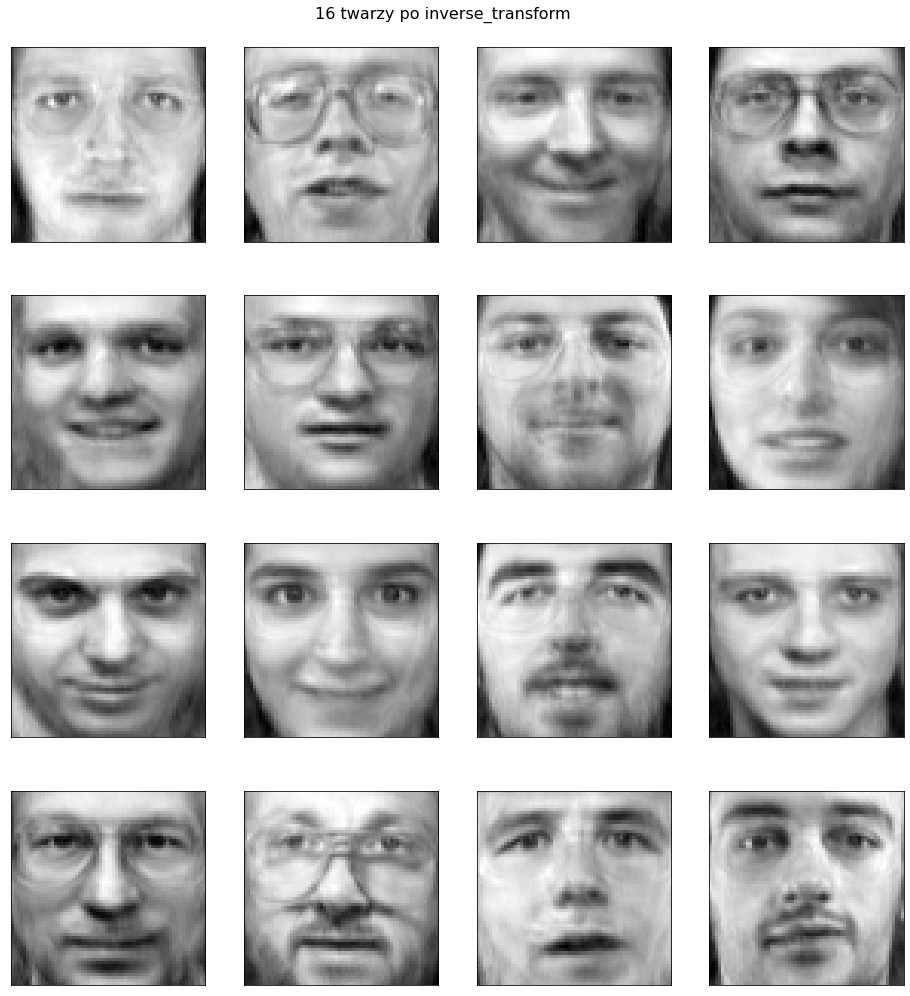

In [27]:
plot_images(faces_inversed[ind], "16 twarzy po inverse_transform", 4, 4)

In [30]:
rmse = [0] * len(faces)
for i in range(len(faces)):
    rmse[i] = mean_squared_error(faces[i], faces_inversed[i], squared=False)

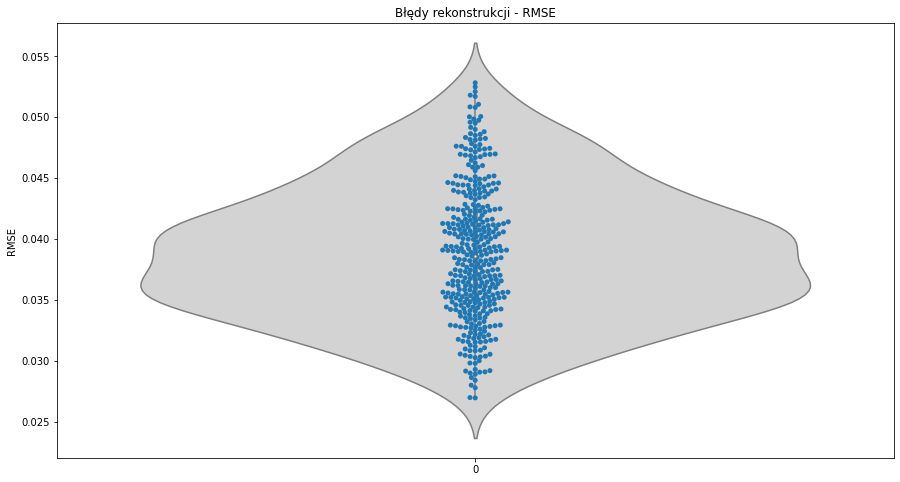

In [41]:
plt.figure(figsize=(15, 8))
sns.swarmplot(data = rmse)
sns.violinplot(data = rmse, color="lightgray")
plt.title("Błędy rekonstrukcji - RMSE")
plt.ylabel("RMSE")
plt.show()

### 3. Zmodyfikowane obrazy

In [46]:
dark_faces = faces[ind]
dark_faces = np.clip(dark_faces - 0.4, 0, 1)

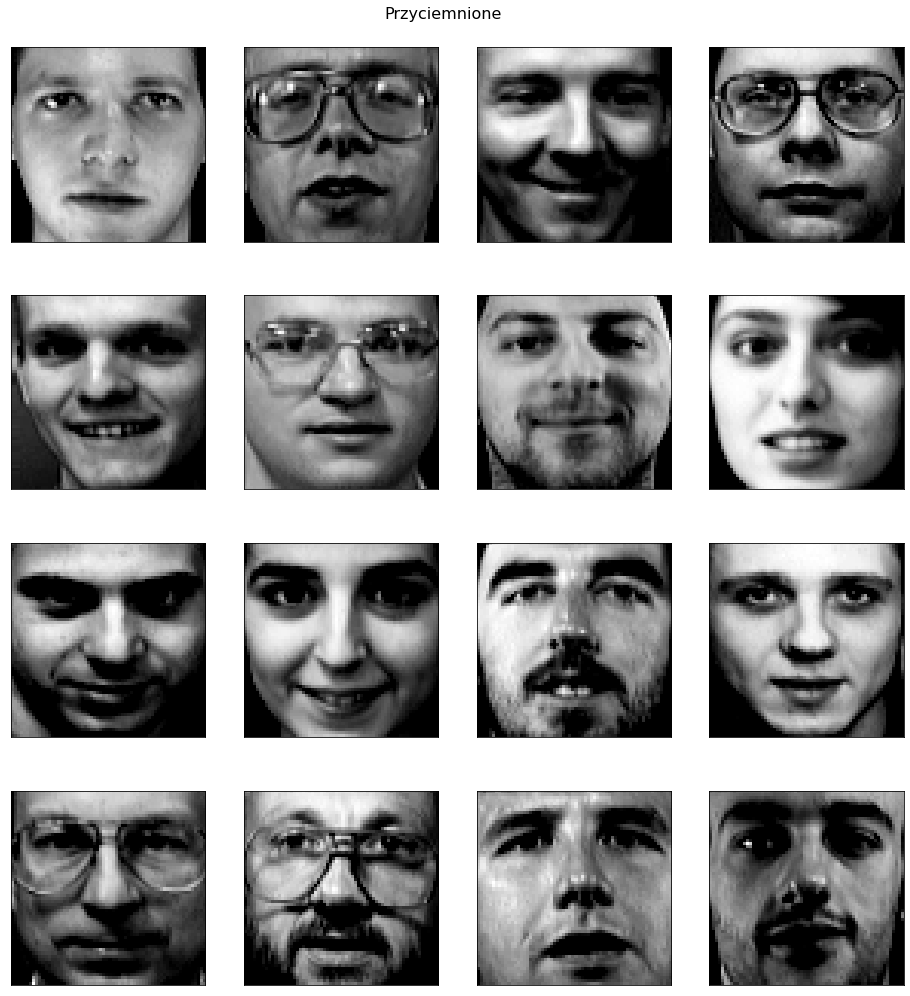

In [47]:
plot_images(dark_faces, "Przyciemnione", 4, 4)

In [48]:
light_faces = faces[ind]
light_faces = np.clip(light_faces + 0.4, 0, 1)

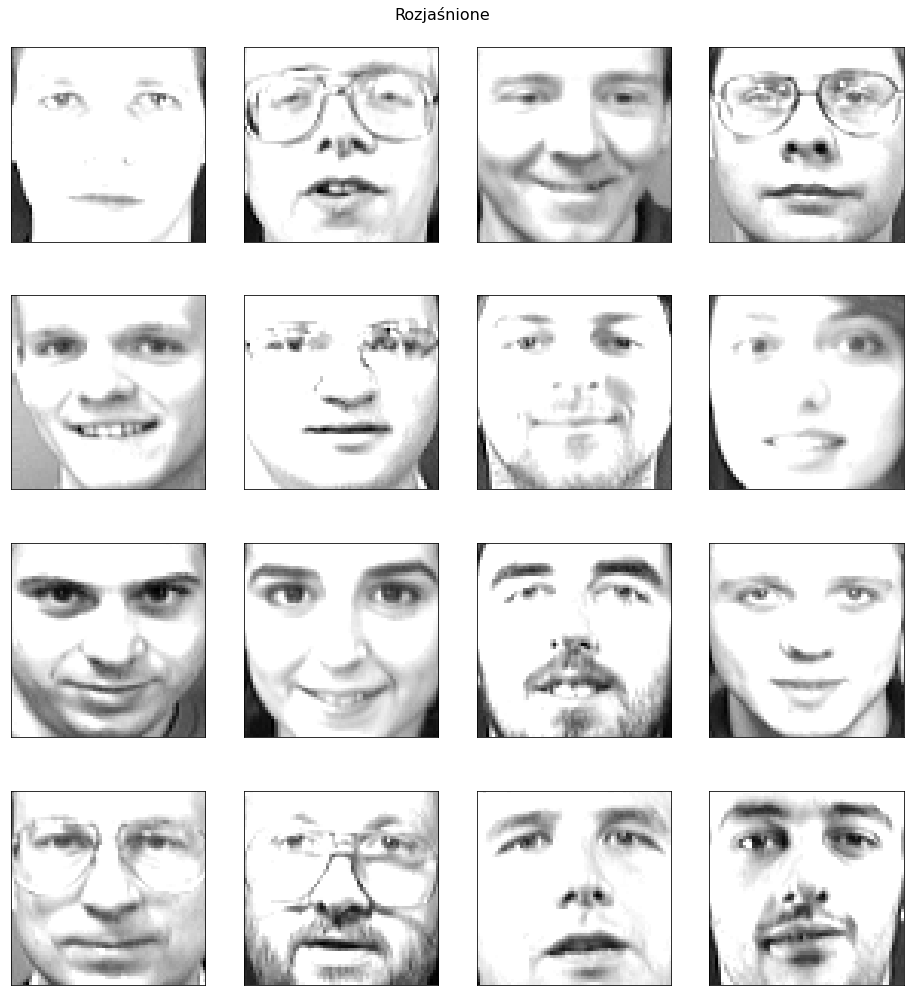

In [49]:
plot_images(light_faces, "Rozjaśnione", 4, 4)

In [50]:
flip_faces = np.flip(faces[ind])

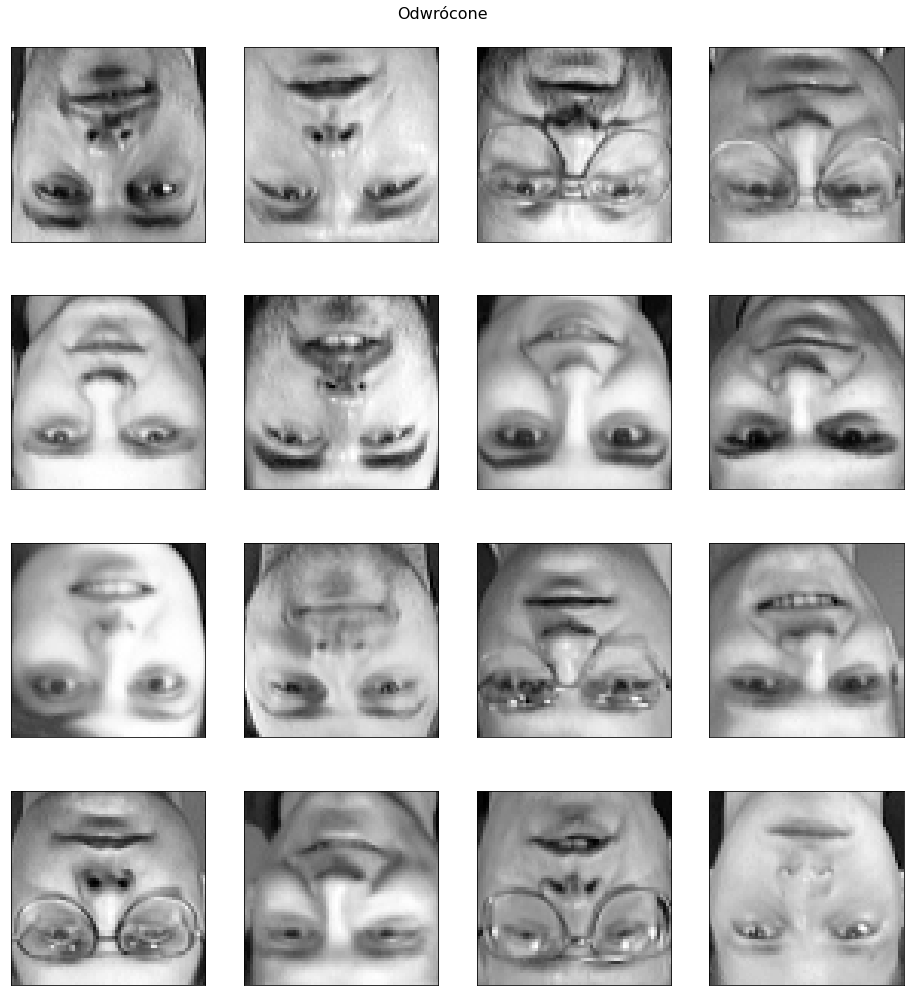

In [52]:
plot_images(flip_faces, "Odwrócone", 4, 4)

### 4. transformacja i odwrotna transformacja i błąd rekonstrukcji

In [53]:
def pca_inverse_transform_modified(modified_pictures):
    transformed_modified_pictures = pca_used.transform(modified_pictures)
    inversed_modified_pictures = pca_used.inverse_transform(transformed_modified_pictures)
    rmse_of_modified = [0] * len(modified_pictures)
    for i in range(len(modified_pictures)):
        rmse_of_modified[i] = mean_squared_error(faces[ind[i]], inversed_modified_pictures[i], squared=False)
    return inversed_modified_pictures, rmse_of_modified

In [55]:
inv_dark, rmse_dark = pca_inverse_transform_modified(dark_faces)
inv_light, rmse_light = pca_inverse_transform_modified(light_faces)
inv_flip, rmse_flip = pca_inverse_transform_modified(flip_faces)

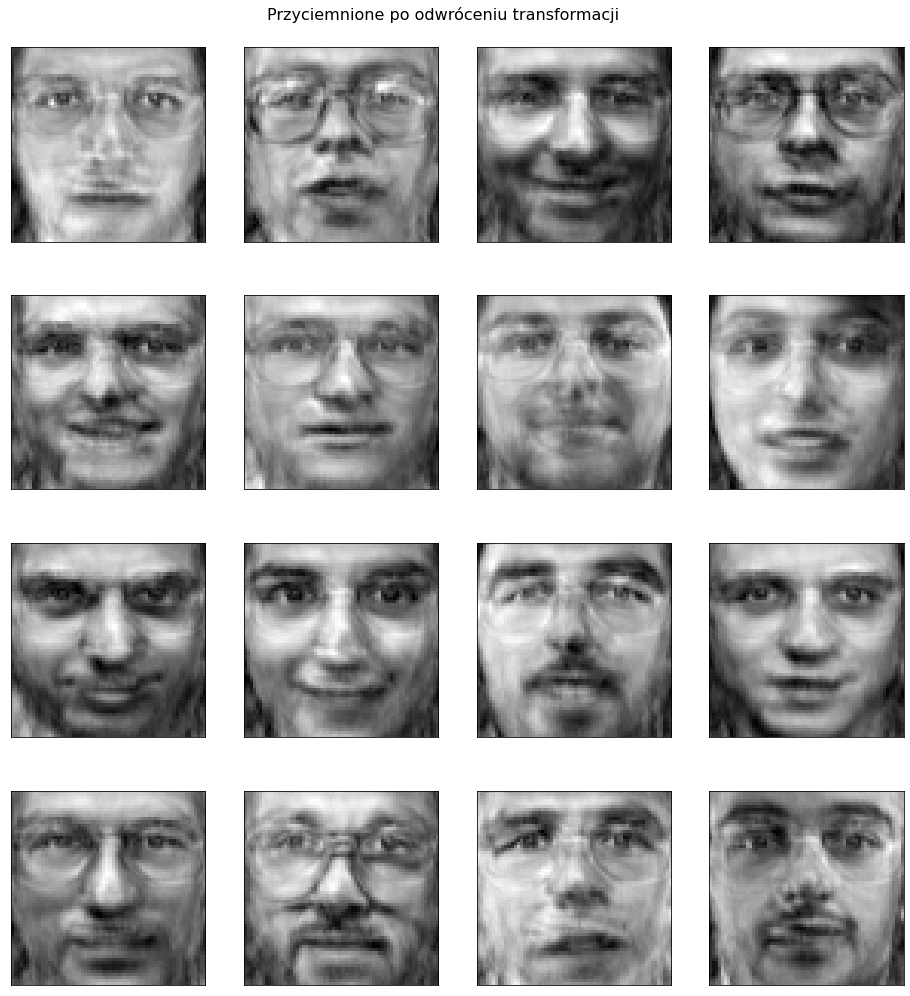

[0.38879177,
 0.39093322,
 0.38207865,
 0.39041167,
 0.39440545,
 0.39806217,
 0.39114502,
 0.38217464,
 0.37637198,
 0.37932822,
 0.38426244,
 0.38150966,
 0.3911888,
 0.38408032,
 0.38990262,
 0.37724778]

In [57]:
plot_images(inv_dark, "Przyciemnione po odwróceniu transformacji", 4, 4) 
rmse_dark

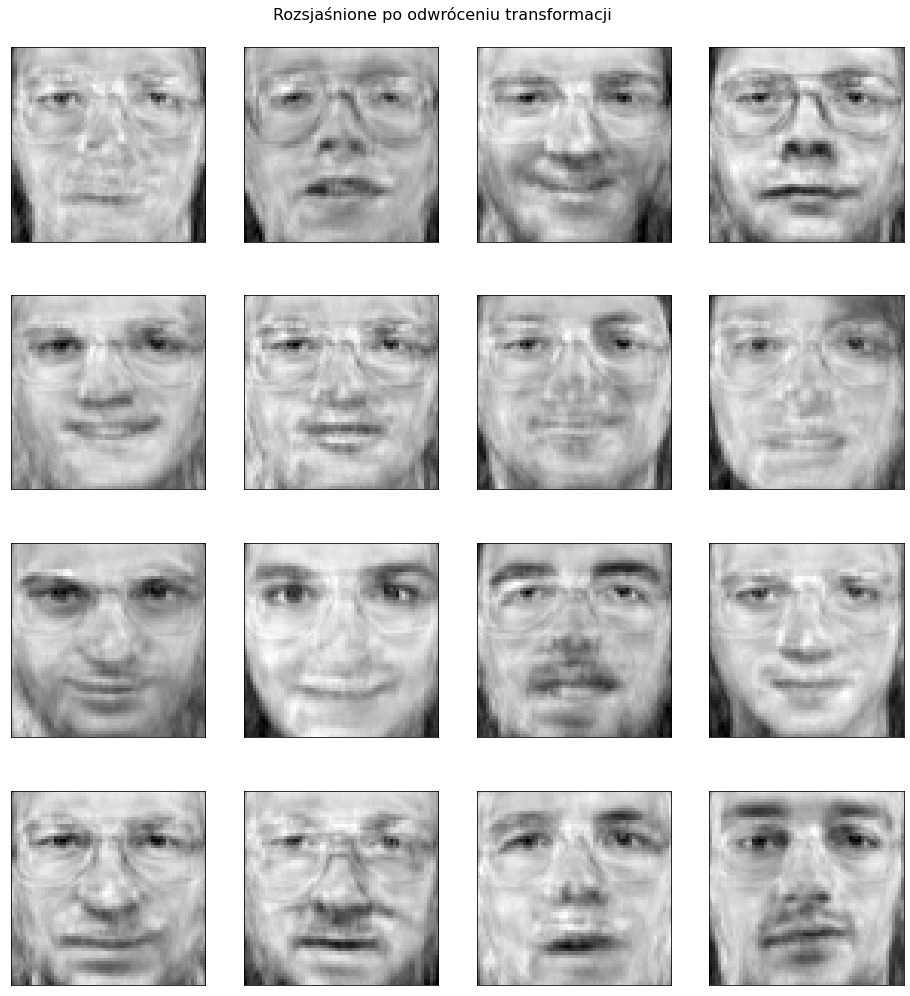

[0.3264603,
 0.37389538,
 0.37005568,
 0.37017173,
 0.3668929,
 0.3356422,
 0.3290835,
 0.32510865,
 0.37136304,
 0.35762182,
 0.34096485,
 0.33778176,
 0.3743467,
 0.3582442,
 0.3666812,
 0.37208328]

In [59]:
plot_images(inv_light, "Rozsjaśnione po odwróceniu transformacji", 4, 4) 
rmse_light

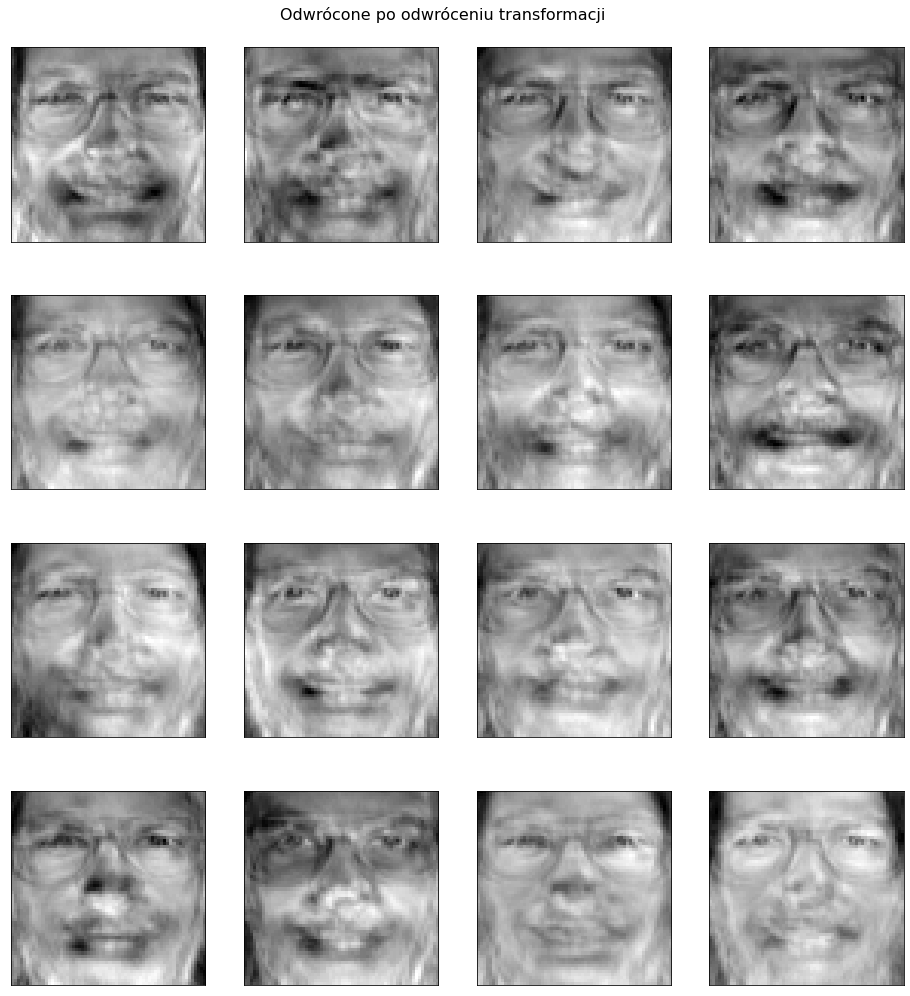

[0.22382867,
 0.16664281,
 0.23946536,
 0.17305188,
 0.20511667,
 0.21330902,
 0.24113987,
 0.25234792,
 0.25234357,
 0.24496864,
 0.22633076,
 0.21447857,
 0.16959257,
 0.24701175,
 0.17212753,
 0.23800418]

In [60]:
plot_images(inv_flip, "Odwrócone po odwróceniu transformacji", 4, 4) 
rmse_flip

### 5. Czy PCA  może służyć do wykrywania pewnego typu anomalii w zdjęciach twarzy?

In [61]:
modified_df = pd.DataFrame({"dark": rmse_dark, 
              "light":rmse_light, "flip": rmse_flip}).describe()
original_df = pd.DataFrame({"original": rmse}).describe()
pd.concat([modified_df, original_df], axis=1)

,dark,light,flip,original
count,16.000000,16.000000,16.000000,400.000000
mean,0.386368,0.354775,0.217485,0.038876
std,0.006350,0.018780,0.031336,0.005456
min,0.376372,0.325109,0.166643,0.026967
25%,0.381936,0.337247,0.197100,0.034883
50%,0.386527,0.362463,0.225080,0.038635
75%,0.390986,0.370470,0.242097,0.042448
max,0.398062,0.374347,0.252348,0.052820


Tak, może. RMSE znacznie różni się u zmodyfikowanych zdjęć.